In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = pd.read_csv('model_data.csv')

In [3]:
data['STATE'] = data['STATE'].astype('category')
data['STATE'] = data['STATE'].cat.codes.astype(int)

In [4]:
data['COUNTY_STATE'] = data['COUNTY_STATE'].astype('category')
data['COUNTY_STATE'] = data['COUNTY_STATE'].cat.codes.astype(int)

In [5]:
shuffled = data.sample(frac=1)
result = np.array_split(shuffled, 50)  

In [6]:
pca_data = result[1]

In [7]:
pca_data.shape

(33647, 42)

In [8]:
pca_data = pca_data.drop('NWCG_GENERAL_CAUSE', axis=1)

pca = PCA(n_components=4)
pca_components = pca.fit_transform(pca_data)

In [9]:
pca.explained_variance_ratio_

array([9.21654861e-01, 5.15548157e-02, 2.62316393e-02, 5.33845014e-04])

In [10]:
pca_dataframe = pd.DataFrame(pca_components, columns=["PC1", "PC2", "PC3", "PC4"])

<Axes: xlabel='PC1', ylabel='PC2'>

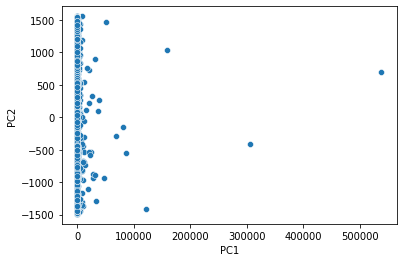

In [11]:
import seaborn as sns

sns.scatterplot(
    data = pca_dataframe,
    x = "PC1",
    y = "PC2"
)

In [12]:
pca_dataframe.shape

(33647, 4)

In [13]:
import scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt


In [14]:
## Step 1: Use PC1 and PC2 for hierarchical clustering.
clusters = hierarchy.linkage(pca_dataframe[["PC1", "PC2"]], method="ward")

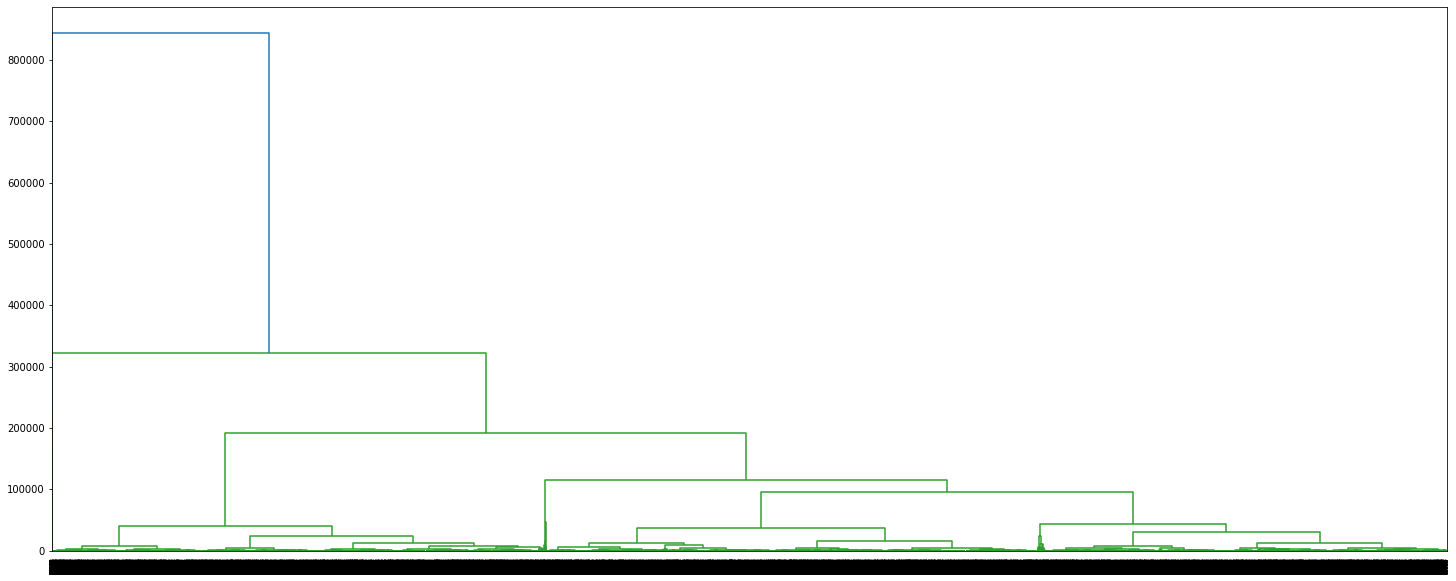

In [15]:
## Step 2: Show the dendrogram.
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clusters)
plt.show()

In [18]:
## Step 3: Perform Hierarchical Clustering using your chosen amount of clusters.
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5)
Y_preds = clustering.fit_predict(pca_dataframe[["PC1", "PC2"]])

pca_dataframe["predicted_hierarchical_cluster"] = Y_preds

<Axes: xlabel='PC1', ylabel='PC2'>

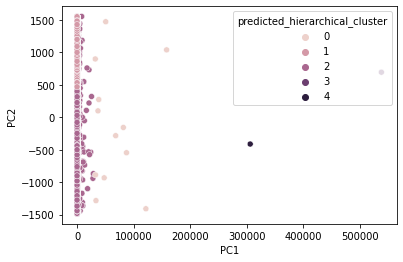

In [19]:
## Step 4: Plot the hierarchical clustering results. Do they make sense?
sns.scatterplot(
    data = pca_dataframe,
    x = "PC1",
    y = "PC2",
    hue = "predicted_hierarchical_cluster"
)